In [10]:
import gym
import seagul.envs
import numpy as np
from numpy import pi, sin, cos
import time
import torch
import matplotlib.pyplot as plt
env = gym.make('su_cartpole-v0')

In [ ]:
def control(env, q):
#     # Ausutay Ozmen
#     if -0.2 < q[0] < 0.2 and -2 < q[2] < 2:
#         return 10

#     elif(q[0] < 145 * pi / 180) or (q[0] > 215 * pi / 180):
#         # swing up
#         # energy error: Ee
#         Ee = 0.5 * env.mp * env.L * env.L * q[2] ** 2 - env.mp * env.g * env.L * (1 + cos(q[0]))
#         # energy conrol gain:
#         k = 0.23

#         # input acceleration: A (of cart)
#         A = k * Ee * cos(q[0]) * q[2]
#         # convert A to u (using EOM)
#         delta = env.mp * sin(q[0]) ** 2 + env.mc
#         u = A * delta - env.mp * env.L * (q[2] ** 2) * sin(q[0]) - env.mp * env.g * sin(q[2]) * cos(q[2])
#     else:
        # balancing
        # LQR: K values from MATLAB
    k1 = 140.560
    k2 = -3.162
    k3 = 41.772
    k4 = -8.314
    u = -(k1 * (q[0] - pi) + k2 * q[1] + k3 * q[2] + k4 * q[3])
    return u


In [12]:
def control(env, q):
    # Ausutay Ozmen
    if -0.2 < q[0] < 0.2 and -2 < q[2] < 2:
        return -10
    
    elif ((140 * pi/180 < q[0] < pi) and (q[1] <= 0)) or ((pi < q[0] < 220 * pi/180) and q[1] >= 0):
        # balancing
        # LQR: K values from MATLAB
        k1 = 140.560
        k2 = -3.162
        k3 = 41.772
        k4 = -8.314
        #print("balancing")
        u = -25*(k1 * (q[0] - pi) + k2 * q[1] + k3 * q[2] + k4 * q[3])
    
    else: 
        # swing up
        # energy error: Ee
        Ee = 0.5 * env.mp * env.L * env.L * q[2] ** 2 - env.mp * env.g * env.L * (1 + cos(q[0]))
        # energy conrol gain:
        k = 0.23
    
        # input acceleration: A (of cart)
        A = k * Ee * cos(q[0]) * q[2]
        # convert A to u (using EOM)
        delta = env.mp * sin(q[0]) ** 2 + env.mc
        u = A * delta - env.mp * env.L * (q[2] ** 2) * sin(q[0]) - env.mp * env.g * sin(q[2]) * cos(q[2])
    
    return u

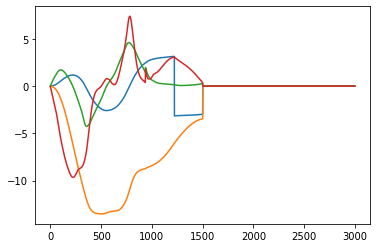

In [13]:
obs = env.reset() 

state_hist = np.zeros((3000,4))
for i in range(3000):
    actions = control(env, obs)
    obs, reward, done, _ = env.step(actions)
    #action_hist[i, :] = np.copy(actions)
    state_hist[i, :] = np.copy(obs)
    #reward_hist[i, :] = np.copy(reward)
    #time.sleep(.1)

    #env.render()
    if done:
        break

plt.plot(state_hist)